In [12]:
import numpy as np
import pandas as pd

In [45]:
check_in = pd.read_csv("yelp_checkin.csv")
check_in

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1
...,...,...,...,...
3911213,CZKHXlDuy3IagC2W881fyA,Fri,5:00,7
3911214,mUWE-uNGyCiifmboWbyMqQ,Mon,17:00,1
3911215,nFR7dDedxRuBeZz_6Cdalg,Mon,23:00,1
3911216,y3YRUsh8FVih0AhYLx-DWA,Thu,21:00,1


In [43]:
import json
import pandas as pd

# Specify the encoding to be 'utf-8'
with open("yelp_academic_dataset_business.json", encoding='utf-8') as data_file:
    data = [json.loads(line) for line in data_file]

business = pd.DataFrame(data)

In [48]:
sb_bus = business[business['city'] == 'Santa Barbara']

In [41]:
check_in[check_in['business_id'] == 'yPSejq3_erxo9zdVYTBnZA']

,business_id,weekday,hour,checkins,hour_only


In [49]:
pd.merge(left=sb_bus, right=check_in, on='business_id', how='inner')

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,weekday,hour,checkins


In [89]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [92]:
#checkins exploration
df=check_in.groupby(['weekday','hour'])['check_in'].sum()
df=df.reset_index()
df=df.pivot(index='hour',columns='weekday')[['check_in']]
df.columns = df.columns.droplevel()
df=df.reset_index()
# Workaround for not being able to sort the values by hour
df.hour=df.hour.apply(lambda x: str(x).split(':')[0])
df.hour=df.hour.astype(int)
# Sort the hour column 
df=df.sort_values('hour')
df=df[['hour','Mon', 'Tue','Wed','Thu','Fri','Sat', 'Sun' ]]
# df=df.set_index('hour')
cm = sns.light_palette("orange", as_cmap=True)
#highlight the max of each column
df.style.apply(highlight_max, color='darkorange', axis=0)

weekday,hour,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,0,4132,2202,2027,1992,2234,3361,5114
1,1,4637,3076,3159,3213,3607,5138,6629
2,2,4895,3576,3697,3767,4398,6144,7656
3,3,3721,2694,2816,3066,3519,5675,6994
4,4,1816,1479,1628,1647,2152,3836,4504
5,5,748,570,731,713,1064,1987,2445
6,6,285,256,320,285,478,1079,1307
7,7,151,106,132,134,248,568,704
8,8,94,53,67,73,133,298,383
9,9,46,27,38,29,59,109,180


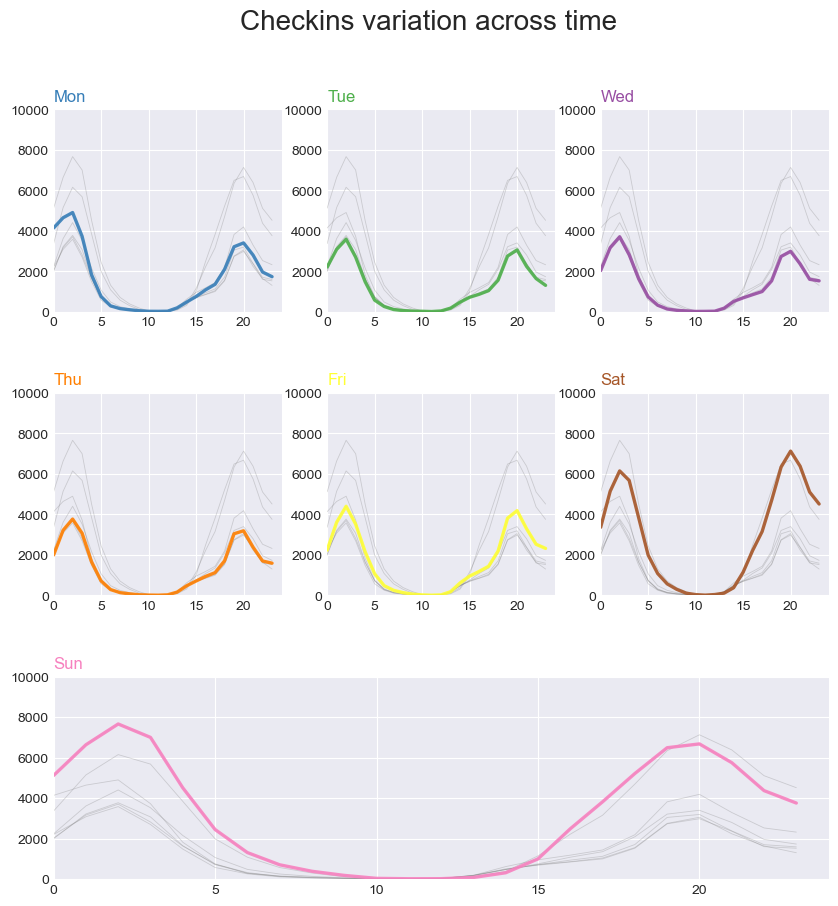

In [101]:
# Initialize the figure
plt.style.use('seaborn-darkgrid')
# create a color palette
palette = plt.get_cmap('Set1')
plt.figure(figsize=(10,10))
plt.suptitle("Checkins variation across time",fontsize=20)
gridspec.GridSpec(3,3)
plt.subplots_adjust(hspace=0.4)

# multiple line plot
num=0
for column in df.drop('hour', axis=1):
    num+=1
    # Find the right spot on the plot
    
    if num==7:  # adjustment to fit sunday
        plt.subplot2grid((3,3),(2,0),colspan=3)
    else:
        plt.subplot(3,3, num)
    
    # plot every groups, but discreet
    for v in df.drop('hour', axis=1):
        plt.plot(df['hour'], df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
    # Plot the lineplot
    plt.plot(df['hour'], df[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
    # Same limits for everybody!
    plt.xlim(0,24)
    plt.ylim(-5,10000)
    # Not ticks everywhere
    if num in range(4) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num))

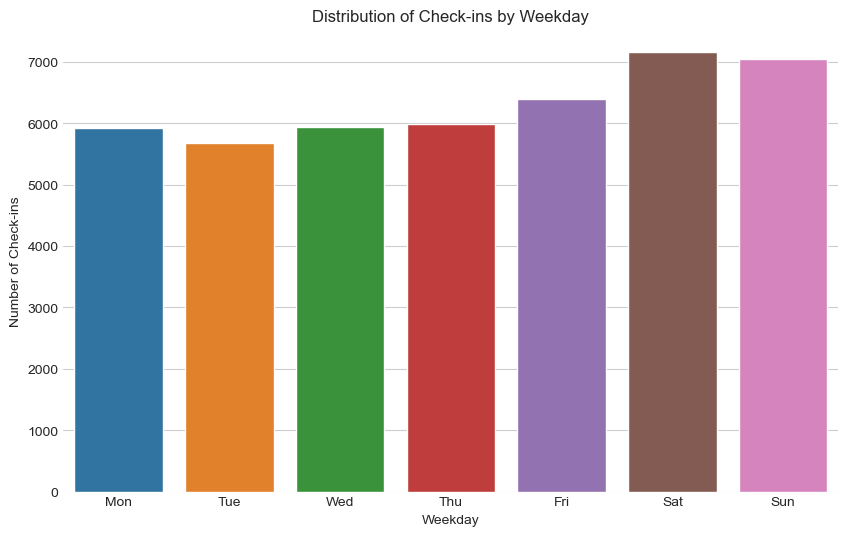

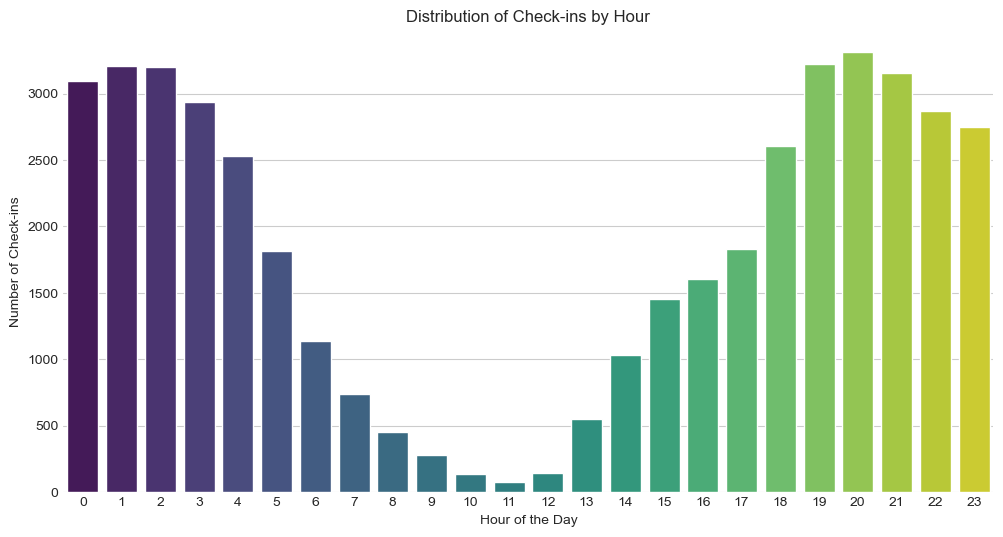

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Visualization 1: Distribution of check-ins by weekday
plt.figure(figsize=[10, 6])
sns.countplot(x='weekday', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], data=check_in)
plt.title('Distribution of Check-ins by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Check-ins')
plt.show()

# Visualization 2: Distribution of check-ins by hour
# Convert 'hour' to just the hour part for plotting
# check_in['hour_only'] = check_in['hour'].apply(lambda x: int(x.split(':')[0]))
plt.figure(figsize=[12, 6])
sns.countplot(x='hour', data=check_in, palette="viridis")
plt.title('Distribution of Check-ins by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Check-ins')
plt.xticks(range(0, 24))
plt.show()


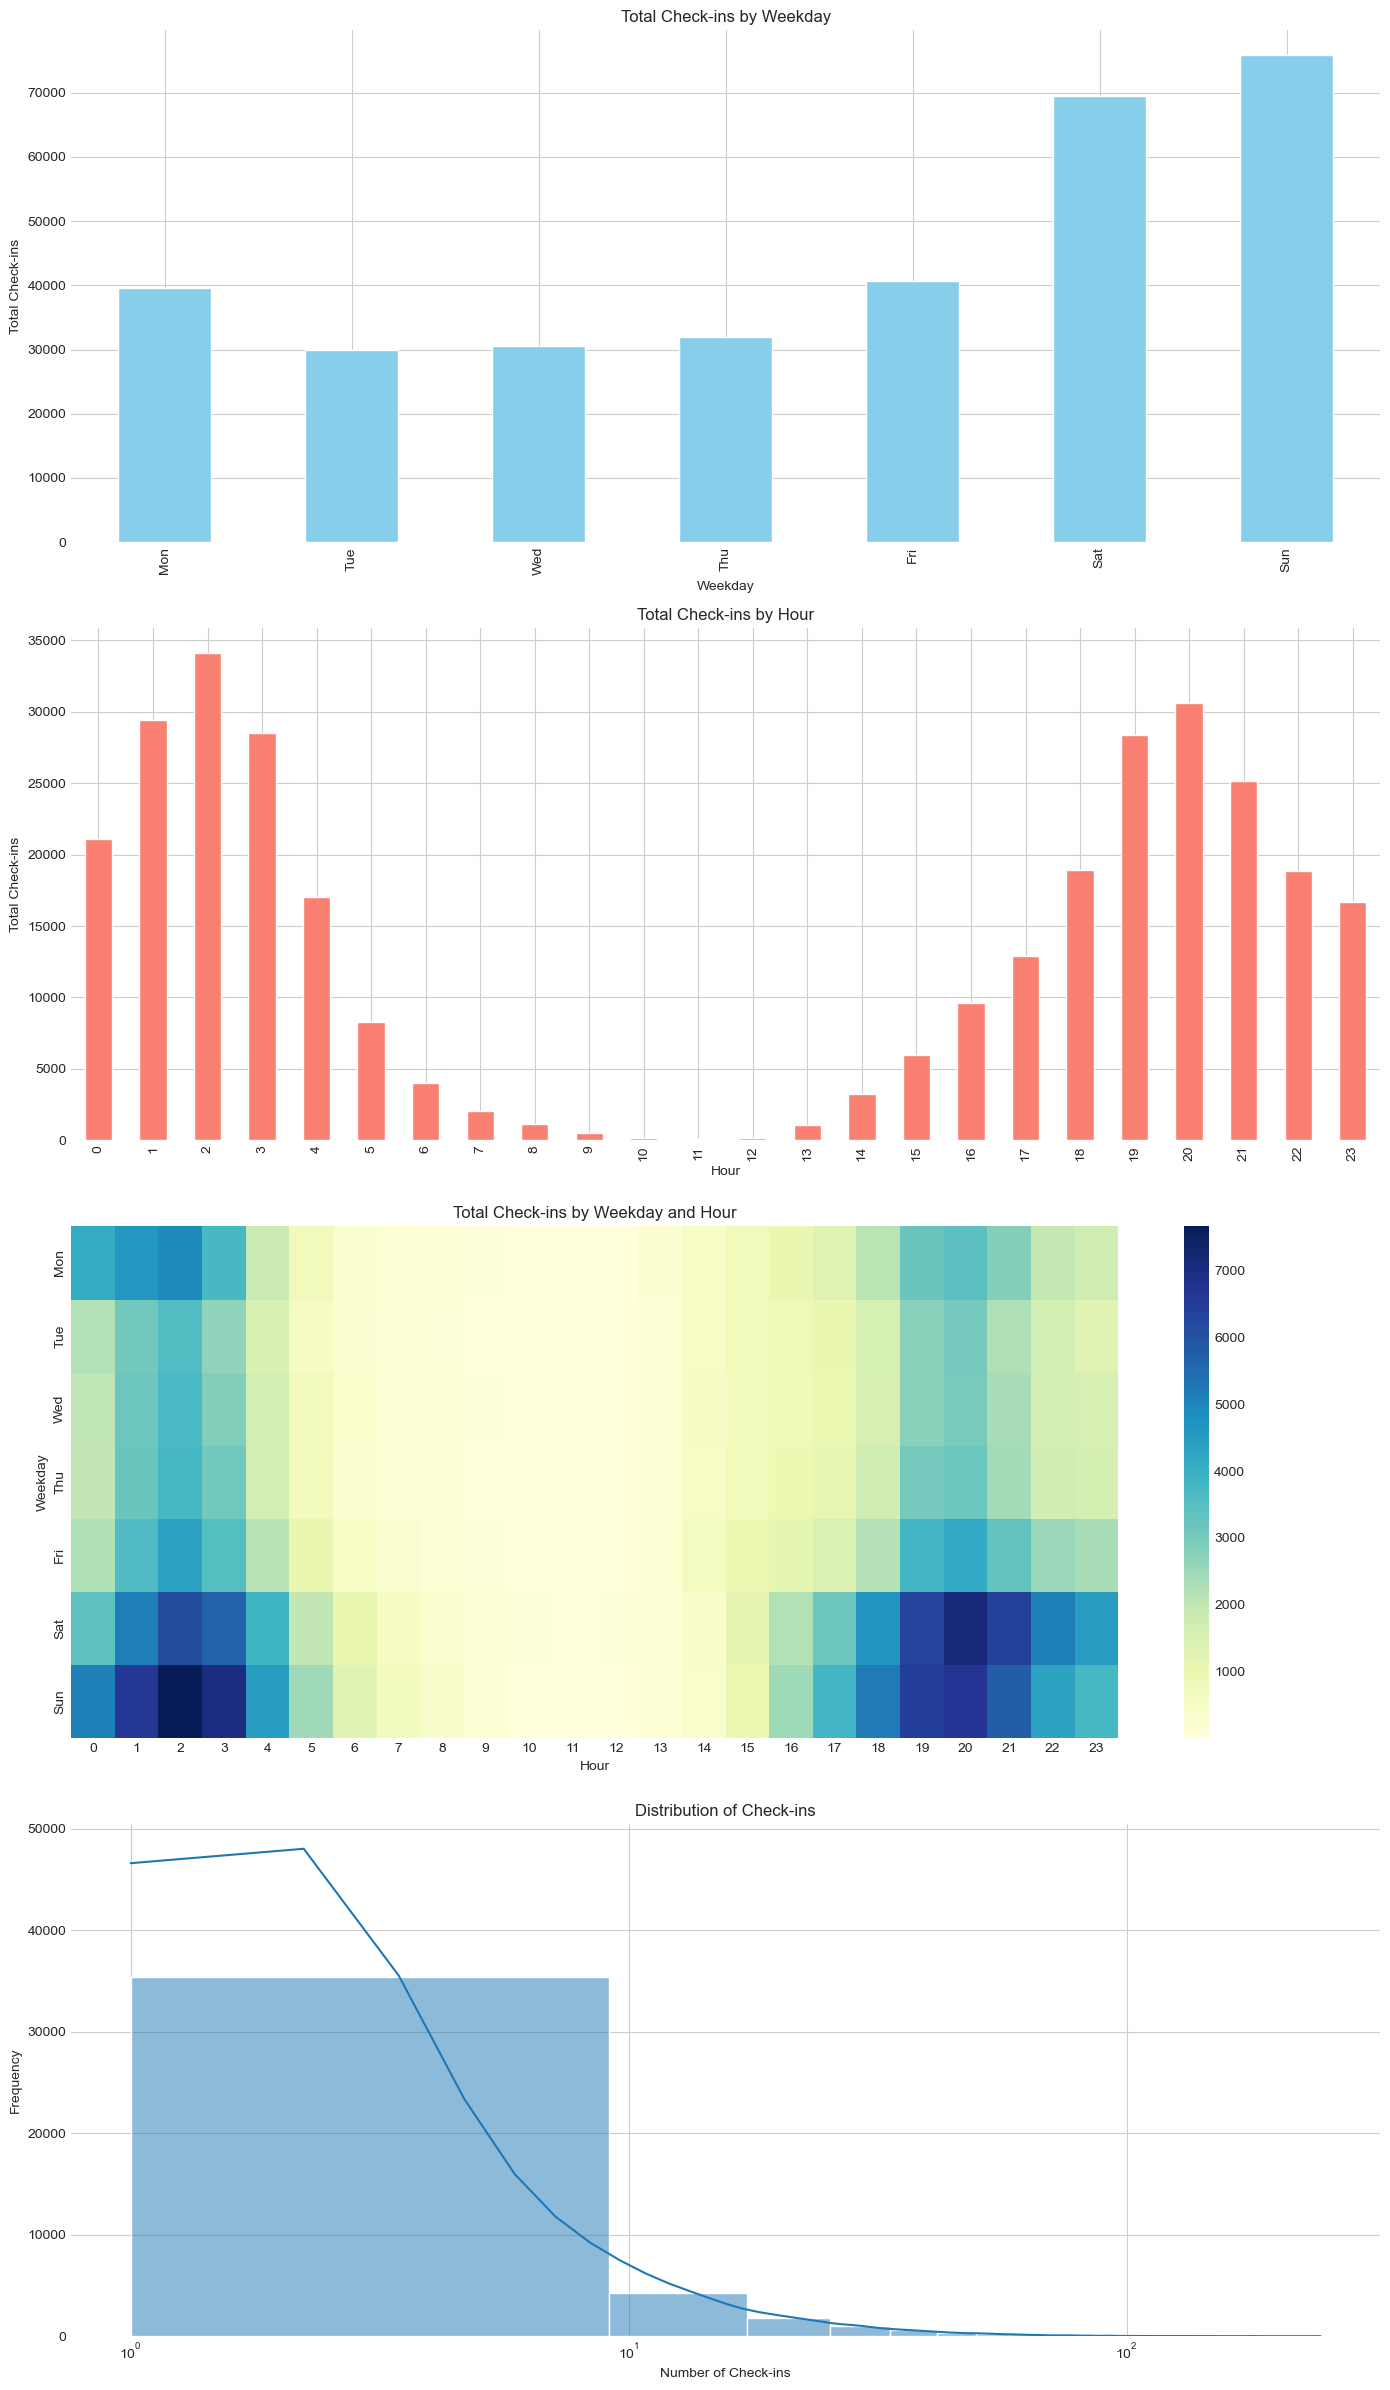

Text(0, 0.5, 'Total Check-ins')

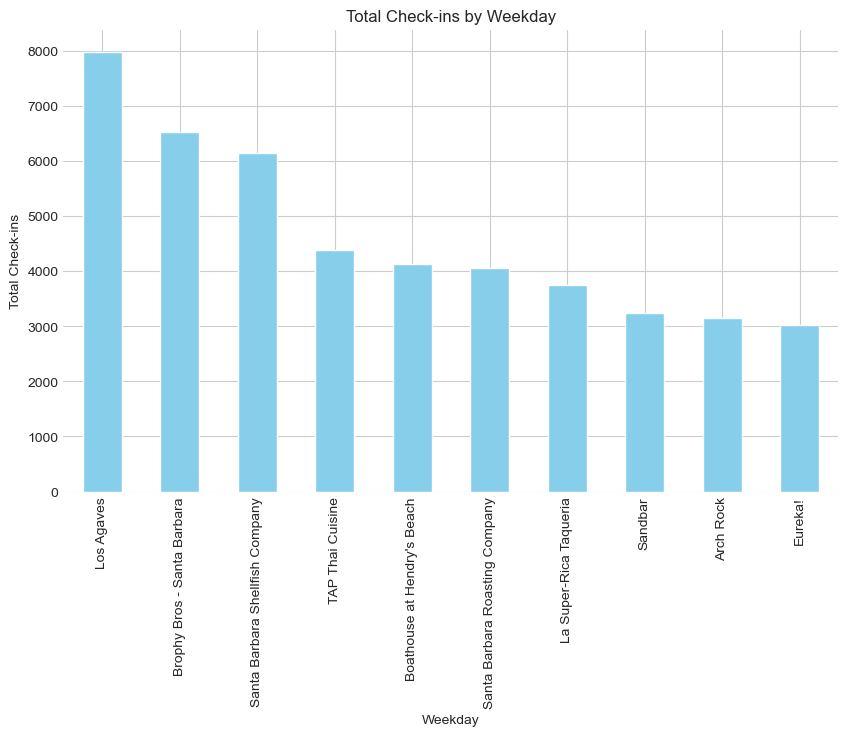

In [112]:
# EDA on 'yelp_checkin.csv': Deeper Analysis
yelp_checkin_df = check_in
# 1. Check-ins by Weekday
weekday_checkins = yelp_checkin_df.groupby('weekday')['check_in'].sum().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# 2. Check-ins by Hour
hour_checkins = yelp_checkin_df.groupby('hour')['check_in'].sum()

# 3. Check-ins by Weekday and Hour
weekday_hour_checkins = yelp_checkin_df.groupby(['weekday', 'hour'])['check_in'].sum().unstack().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# 4. Top Businesses for Check-ins
top_businesses_checkins = yelp_checkin_df.groupby('name')['check_in'].sum().sort_values(ascending=False).head(10)

# 5. Distribution of Check-ins
checkins_distribution = yelp_checkin_df['check_in']

# Visualizing the results
plt.figure(figsize=[14, 24])

# Weekday check-ins
plt.subplot(4, 1, 1)
weekday_checkins.plot(kind='bar', color='skyblue')
plt.title('Total Check-ins by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Check-ins')

# Hour check-ins
plt.subplot(4, 1, 2)
hour_checkins.plot(kind='bar', color='salmon')
plt.title('Total Check-ins by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Check-ins')

# Weekday and Hour check-ins
plt.subplot(4, 1, 3)
sns.heatmap(weekday_hour_checkins, cmap='YlGnBu')
plt.title('Total Check-ins by Weekday and Hour')
plt.xlabel('Hour')
plt.ylabel('Weekday')

# Distribution of Check-ins
plt.subplot(4, 1, 4)
sns.histplot(checkins_distribution, bins=30, kde=True)
plt.title('Distribution of Check-ins')
plt.xlabel('Number of Check-ins')
plt.ylabel('Frequency')
plt.xscale('log')  # Log scale due to long-tail distribution

plt.tight_layout()
plt.show()

# Output top businesses with most check-ins
top_businesses_checkins

plt.figure(figsize=(10,6))
top_businesses_checkins.plot(kind='bar', color='skyblue')
plt.title('Total Check-ins by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Check-ins')

In [74]:
import json
import pandas as pd
data_file = open("yelp_academic_dataset_checkin.json")
data = []
for line in data_file:
    data.append(json.loads(line))
checkin_df = pd.DataFrame(data)
data_file.close()

In [54]:
checkin_df.to_csv("check_in.csv", index=False)

In [75]:
checkin_df

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,"2013-03-23 16:22:47, 2013-04-07 02:03:12, 2013..."
131926,zznZqH9CiAznbkV6fXyHWA,2021-06-12 01:16:12
131927,zzu6_r3DxBJuXcjnOYVdTw,"2011-05-24 01:35:13, 2012-01-01 23:44:33, 2012..."
131928,zzw66H6hVjXQEt0Js3Mo4A,"2016-12-03 23:33:26, 2018-12-02 19:08:45"


In [53]:
pd.merge(left=sb_bus, right=checkin_df, on='business_id', how='inner')

,business_id,name_x,address_x,city_x,state_x,postal_code_x,latitude_x,longitude_x,stars_x,review_count_x,...,state_y,postal_code_y,latitude_y,longitude_y,stars_y,review_count_y,is_open_y,attributes_y,categories_y,hours_y
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.700460,3.0,24,...,CA,93101,34.420209,-119.700460,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'..."
2,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,...,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
3,nUqrF-h9S7myCcvNDecOvw,Iron Horse Auto Body,825 Cacique St,Santa Barbara,CA,93103,34.419620,-119.677032,4.5,32,...,CA,93103,34.419620,-119.677032,4.5,32,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Towing, Automotive, Body Shops","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
4,bYjnX_J1bHZob10DoSFkqQ,Tinkle Belle Diaper Service,,Santa Barbara,CA,93101,34.420334,-119.710749,5.0,17,...,CA,93101,34.420334,-119.710749,5.0,17,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Parenting Classes, Maternity Wear, Fashion, Ed...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3824,TSwMwVq5GtQh5LW2t32uGA,Woody's Roundup Bar & Grill,"Earl Warren Showgrounds, 3400 Calle Real",Santa Barbara,CA,93105,34.430895,-119.735645,2.0,6,...,CA,93105,34.430895,-119.735645,2.0,6,0,"{'Caters': 'True', 'BusinessParking': '{'garag...","Barbeque, Bars, Restaurants, Nightlife",None
3825,Bo-GGwQNcLVwyKeYkbfAYg,Vino Divino,2012 De La Vina St,Santa Barbara,CA,93105,34.429154,-119.717222,5.0,19,...,CA,93105,34.429154,-119.717222,5.0,19,1,"{'BusinessParking': '{'garage': False, 'street...","Event Planning & Services, Wine Tasting Room, ...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-18:0', ..."
3826,f7rTfTv6dwO-ovKhz-Rvgw,"Joanne & Tem Gronquist, OD","1805 State St, Ste B",Santa Barbara,CA,93101,34.428995,-119.712718,4.5,15,...,CA,93101,34.428995,-119.712718,4.5,15,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Shopping, Eyewear & Opticians, Health & Medica...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
3827,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,...,CA,93105,34.440689,-119.739681,4.0,299,0,"{'NoiseLevel': 'u'average'', 'RestaurantsGoodF...","Restaurants, Pizza, Food","{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'..."


In [76]:
corrected_checkin_df = checkin_df

In [77]:
# Prepare data by splitting and expanding the date fields into separate rows
expanded_rows = []
for _, row in corrected_checkin_df.iterrows():
    business_id = row['business_id']
    dates = row['date'].split(',')
    for date in dates:
        expanded_rows.append({'business_id': business_id, 'date': date.strip()})

# Convert expanded data into a DataFrame
expanded_checkin_df_correct = pd.DataFrame(expanded_rows)

# Convert 'date' to datetime format and extract 'weekday' and 'hour'
expanded_checkin_df_correct['date'] = pd.to_datetime(expanded_checkin_df_correct['date'])
expanded_checkin_df_correct['weekday'] = expanded_checkin_df_correct['date'].dt.day_name().str[:3]  # Shorten to three-letter abbreviation
expanded_checkin_df_correct['hour'] = expanded_checkin_df_correct['date'].dt.hour

# Group by 'business_id', 'weekday', 'hour' and count check-ins
corrected_grouped_checkins_correct = expanded_checkin_df_correct.groupby(['business_id', 'weekday', 'hour']).size().reset_index(name='check_in')

# Display corrected and transformed data
corrected_grouped_checkins_correct

,business_id,weekday,hour,check_in
0,---kPU91CF4Lq2-WlRu9Lw,Fri,21,3
1,---kPU91CF4Lq2-WlRu9Lw,Fri,22,1
2,---kPU91CF4Lq2-WlRu9Lw,Sat,15,1
3,---kPU91CF4Lq2-WlRu9Lw,Sat,21,1
4,---kPU91CF4Lq2-WlRu9Lw,Thu,16,1
...,...,...,...,...
3670317,zzu6_r3DxBJuXcjnOYVdTw,Wed,18,1
3670318,zzu6_r3DxBJuXcjnOYVdTw,Wed,23,1
3670319,zzw66H6hVjXQEt0Js3Mo4A,Sat,23,1
3670320,zzw66H6hVjXQEt0Js3Mo4A,Sun,19,1


In [78]:
pd.merge(left=sb_bus, right=corrected_grouped_checkins_correct, on='business_id', how='inner')

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,weekday,hour,check_in
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,Fri,20,1
1,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.700460,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",Fri,0,5
2,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.700460,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",Fri,1,6
3,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.700460,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",Fri,2,3
4,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.700460,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",Fri,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97933,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,0,"{'NoiseLevel': 'u'average'', 'RestaurantsGoodF...","Restaurants, Pizza, Food","{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",Wed,19,1
97934,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,0,"{'NoiseLevel': 'u'average'', 'RestaurantsGoodF...","Restaurants, Pizza, Food","{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",Wed,20,3
97935,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,0,"{'NoiseLevel': 'u'average'', 'RestaurantsGoodF...","Restaurants, Pizza, Food","{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",Wed,21,2
97936,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,0,"{'NoiseLevel': 'u'average'', 'RestaurantsGoodF...","Restaurants, Pizza, Food","{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",Wed,22,4


In [79]:
sb_bus

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
26,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.700460,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'..."
85,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
91,nUqrF-h9S7myCcvNDecOvw,Iron Horse Auto Body,825 Cacique St,Santa Barbara,CA,93103,34.419620,-119.677032,4.5,32,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Towing, Automotive, Body Shops","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
120,bYjnX_J1bHZob10DoSFkqQ,Tinkle Belle Diaper Service,,Santa Barbara,CA,93101,34.420334,-119.710749,5.0,17,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Parenting Classes, Maternity Wear, Fashion, Ed...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150239,TSwMwVq5GtQh5LW2t32uGA,Woody's Roundup Bar & Grill,"Earl Warren Showgrounds, 3400 Calle Real",Santa Barbara,CA,93105,34.430895,-119.735645,2.0,6,0,"{'Caters': 'True', 'BusinessParking': '{'garag...","Barbeque, Bars, Restaurants, Nightlife",None
150264,Bo-GGwQNcLVwyKeYkbfAYg,Vino Divino,2012 De La Vina St,Santa Barbara,CA,93105,34.429154,-119.717222,5.0,19,1,"{'BusinessParking': '{'garage': False, 'street...","Event Planning & Services, Wine Tasting Room, ...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-18:0', ..."
150284,f7rTfTv6dwO-ovKhz-Rvgw,"Joanne & Tem Gronquist, OD","1805 State St, Ste B",Santa Barbara,CA,93101,34.428995,-119.712718,4.5,15,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Shopping, Eyewear & Opticians, Health & Medica...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
150290,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,0,"{'NoiseLevel': 'u'average'', 'RestaurantsGoodF...","Restaurants, Pizza, Food","{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'..."


In [81]:
# Filter rows that contain the keyword 'Restaurants'
filtered_df = sb_bus[sb_bus['categories'].str.contains("Restaurants", case=False, na=False)]
filtered_df = filtered_df.reset_index(drop=True)

In [82]:
filtered_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
1,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Live/Raw Food, Restaurants, Seafood, Beer Bar,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
2,ifjluUv4VASwmFqEp8cWlQ,Marty's Pizza,2733 De La Vina St,Santa Barbara,CA,93105,34.436236,-119.726147,4.0,64,1,"{'Alcohol': 'u'none'', 'BusinessAcceptsCreditC...","Pizza, Restaurants","{'Tuesday': '11:0-21:30', 'Wednesday': '11:0-2..."
3,UFpCraqzFBAhtZqmxmiWsA,Cat Therapy,"1213 State St, Ste L",Santa Barbara,CA,93101,34.423302,-119.705471,4.5,116,1,"{'WheelchairAccessible': 'True', 'WiFi': 'u'fr...","Themed Cafes, Cafes, Pets, Arts & Entertainmen...","{'Monday': '10:0-17:15', 'Wednesday': '10:0-19..."
4,Hqz96v1ymucUKNzIWfEKXw,Subway,"1936 State St, Ste B",Santa Barbara,CA,93101,34.430822,-119.714156,3.0,5,0,"{'Alcohol': 'u'none'', 'Caters': 'True', 'Bike...","Restaurants, Delis, Sandwiches, Fast Food","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,Hlx8S2GLF7hMuIKx4sU-gg,Cesar's Place,712 N Milpas St,Santa Barbara,CA,93103,34.428599,-119.688223,4.0,117,1,"{'BYOBCorkage': ''no'', 'RestaurantsReservatio...","Mexican, Restaurants, Fish & Chips","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
763,bVaRZDHkWdsHuARGxxpREw,Sushi Bar 29,1134 Chapala St,Santa Barbara,CA,93101,34.422291,-119.705339,4.5,97,1,"{'WiFi': 'u'no'', 'RestaurantsTableService': '...","Japanese, Restaurants, Noodles, Sushi Bars","{'Monday': '17:0-21:30', 'Tuesday': '17:0-21:3..."
764,izSgTrqebu8bN8ONOCs6cQ,Oat Bakery,5 W Haley St,Santa Barbara,CA,93101,34.416548,-119.695626,5.0,123,1,"{'Alcohol': 'u'none'', 'HasTV': 'False', 'Bike...","Bakeries, Vegan, Specialty Food, Food Delivery...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-18:0', '..."
765,TSwMwVq5GtQh5LW2t32uGA,Woody's Roundup Bar & Grill,"Earl Warren Showgrounds, 3400 Calle Real",Santa Barbara,CA,93105,34.430895,-119.735645,2.0,6,0,"{'Caters': 'True', 'BusinessParking': '{'garag...","Barbeque, Bars, Restaurants, Nightlife",None


In [88]:
check_in = pd.merge(left=corrected_grouped_checkins_correct, right=filtered_df, on='business_id', how='inner')